In [4]:
import matplotlib.pyplot as plt
import csv
import itertools
import numpy as np

def load_data_from_csv(filename):
    """Load numerical values from third column of a CSV file"""
    values = []
    with open(filename, 'r') as f:
        reader = csv.reader(f)
        for row in reader:
            # Extract third column value and convert to float
            if len(row) > 1:
              values.append(float(row[2]))
    return values

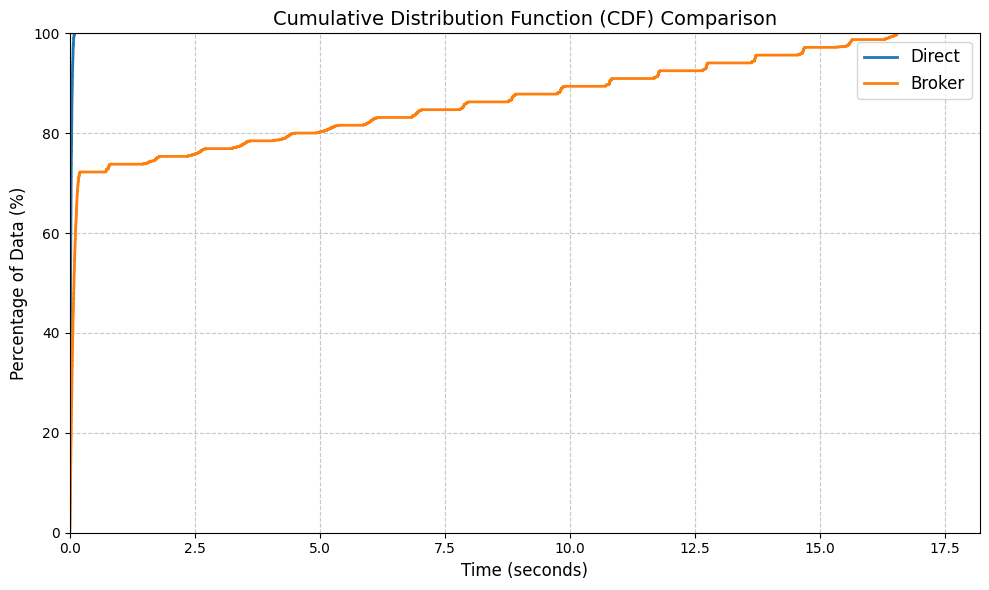

In [7]:

# Read and parse data from CSV files
direct_values = load_data_from_csv('./sample_data/ds5-1_direct.csv')
broker_values = load_data_from_csv('./sample_data/ds5-1_broker.csv')

def calculate_cdf(values):
    """Calculate sorted values and CDF"""
    sorted_values = np.sort(values)
    cdf = np.arange(1, len(sorted_values)+1) / len(sorted_values)
    return sorted_values, cdf

  # Calculate CDFs
direct_sorted, direct_cdf = calculate_cdf(direct_values)
broker_sorted, broker_cdf = calculate_cdf(broker_values)

# Create plot
plt.figure(figsize=(10, 6))
plt.step(direct_sorted, direct_cdf * 100, where='post',
         label='Direct', linewidth=2)
plt.step(broker_sorted, broker_cdf * 100, where='post',
         label='Broker', linewidth=2)

# Formatting
plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('Percentage of Data (%)', fontsize=12)
plt.title('Cumulative Distribution Function (CDF) Comparison', fontsize=14)
plt.xlim(0, max(max(direct_sorted), max(broker_sorted)) * 1.1)
plt.ylim(0, 100)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()

plt.show()


1740888664.5298
[0.0, 0.0010001659393310547, 0.0020999908447265625, 0.0034999847412109375, 0.004800081253051758, 0.005000114440917969, 0.0051000118255615234, 0.006999969482421875, 0.00839996337890625, 1.0099000930786133, 1.0123000144958496, 1.0150001049041748, 1.0171000957489014, 1.019700050354004, 1.0231001377105713, 1.0234999656677246, 1.0246000289916992, 1.02590012550354, 2.029100179672241, 2.036100149154663, 2.036900043487549, 2.0370001792907715, 2.04229998588562, 2.045300006866455, 2.045600175857544, 2.045799970626831, 2.0485000610351562, 3.049600124359131, 3.0512001514434814, 3.05430006980896, 3.0550999641418457, 3.055999994277954, 3.0562000274658203, 3.0564000606536865, 3.0566000938415527, 3.0566999912261963, 4.063699960708618, 4.066400051116943, 4.069000005722046, 4.071700096130371, 4.074300050735474, 4.075000047683716, 4.078099966049194, 4.078700065612793, 4.080899953842163, 5.085100173950195, 5.0858001708984375, 5.087500095367432, 5.087700128555298, 5.087800025939941, 5.08790

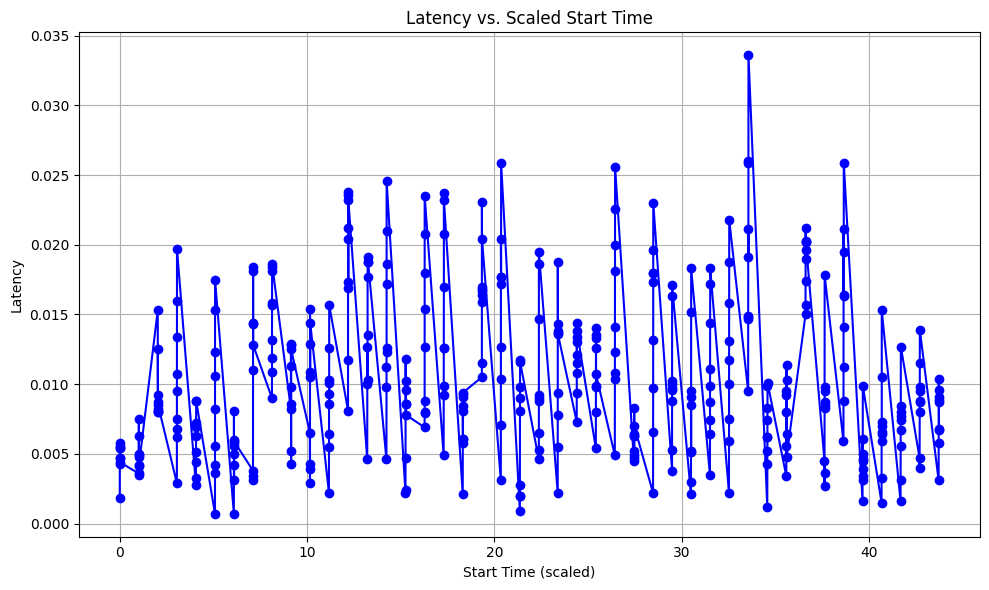

In [21]:
# Plot latency and the left as y, x as start time (min-max scaling)

import csv
import matplotlib.pyplot as plt

def read_data(filename):
    """Read CSV data and return lists of timestamps and latencies."""
    timestamps = []
    latencies = []
    with open(filename, "r") as file:
        reader = csv.reader(file)
        for row in reader:
            # Each row is expected to be: [pub_id, dissemination, latency, timestamp]
            if len(row) < 4:
                continue  # Skip incomplete rows
            try:
                latency = float(row[2])
                timestamp = float(row[3])
                latencies.append(latency)
                timestamps.append(timestamp)
            except ValueError:
                # Skip rows with invalid numerical values
                continue
    return timestamps, latencies

def scale_timestamps(timestamps):
    """
    Min-max scale the timestamps such that the minimum timestamp becomes 0.
    Each scaled timestamp = original timestamp - min(timestamp)
    """
    if not timestamps:
        return []
    min_time = min(timestamps)
    print(min_time)
    return [t - min_time for t in timestamps]

def plot_latency(scaled_timestamps, latencies):
    """Plot latency (y-axis) vs. scaled start time (x-axis)."""
    plt.figure(figsize=(10, 6))
    plt.plot(scaled_timestamps, latencies, marker='o', linestyle='-', color='blue')
    plt.xlabel("Start Time (scaled)")
    plt.ylabel("Latency")
    plt.title("Latency vs. Scaled Start Time")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    filename = "./sample_data/ds1-1_broker_new.csv"
    timestamps, latencies = read_data(filename)
    if not timestamps:
        print("No valid data found in the CSV file.")
    else:
        scaled_timestamps = scale_timestamps(timestamps)
        print(scaled_timestamps)
        plot_latency(scaled_timestamps, latencies)
